### Assigment 4
### Jerrin C. Redmon
### CS-430-01
### November 16, 2022

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
live = pd.read_csv('/content/Live.csv')

In [ ]:
live.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:
live = live.drop('Column1',axis = 1)
live = live.drop('Column2',axis = 1)
live = live.drop('Column3',axis = 1)
live = live.drop('Column4',axis = 1)

In [ ]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


## Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
live['status_id'] = LE.fit_transform(live[['status_id']])
live['status_type'] = LE.fit_transform(live[['status_type']])
live['status_published'] = LE.fit_transform(live[['status_published']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
live.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2831,3,3949,529,512,262,432,92,3,1,1,0
1,2830,1,3917,150,0,0,150,0,0,0,0,0
2,2829,3,3921,227,236,57,204,21,1,1,0,0
3,2828,1,3920,111,0,0,111,0,0,0,0,0
4,2827,1,3832,213,0,0,204,9,0,0,0,0


In [ ]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   status_id         7050 non-null   int64
 1   status_type       7050 non-null   int64
 2   status_published  7050 non-null   int64
 3   num_reactions     7050 non-null   int64
 4   num_comments      7050 non-null   int64
 5   num_shares        7050 non-null   int64
 6   num_likes         7050 non-null   int64
 7   num_loves         7050 non-null   int64
 8   num_wows          7050 non-null   int64
 9   num_hahas         7050 non-null   int64
 10  num_sads          7050 non-null   int64
 11  num_angrys        7050 non-null   int64
dtypes: int64(12)
memory usage: 661.1 KB


#### Comparing likes vs reactions

In [ ]:
X = live[['num_likes', 'num_reactions']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_likes      7050 non-null   int64
 1   num_reactions  7050 non-null   int64
dtypes: int64(2)
memory usage: 110.3 KB


## K Elbow Visualization

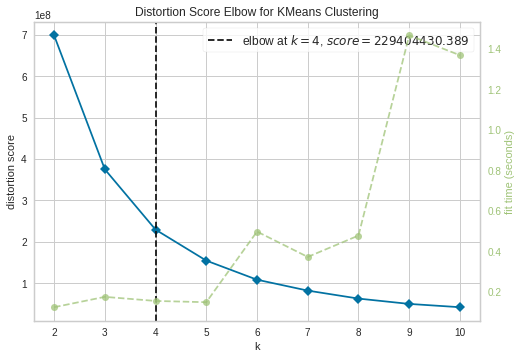

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state = 0)

visualizer = KElbowVisualizer(km, k = 10)
visualizer.fit(X)
visualizer.show()
plt.show()

## Silhouette Coefficent Visualization

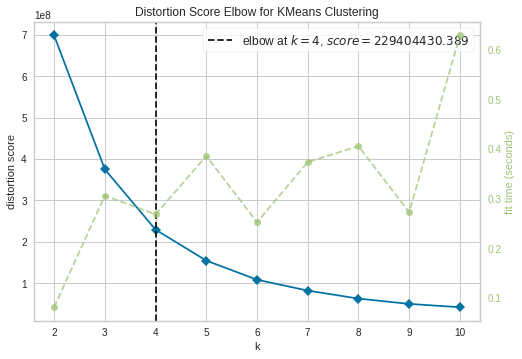

In [ ]:
km = KMeans(random_state = 0)
visualizer_sil = KElbowVisualizer(km, k = 10, metrics = 'silhouette')
visualizer_sil.fit(X)
visualizer_sil.show()
plt.show()

## Clustering

### KMeans

In [ ]:
km = KMeans(n_clusters = 4, random_state = 0)
y_pred = km.fit_predict(X)


In [ ]:
live['cluster'] = y_pred
live.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,2831,3,3949,529,512,262,432,92,3,1,1,0,0
1,2830,1,3917,150,0,0,150,0,0,0,0,0,1
2,2829,3,3921,227,236,57,204,21,1,1,0,0,0
3,2828,1,3920,111,0,0,111,0,0,0,0,0,1
4,2827,1,3832,213,0,0,204,9,0,0,0,0,0


In [ ]:
km.cluster_centers_

array([[ 319.24432263,  353.24119029],
       [  49.40906483,   54.90514439],
       [1135.21637427, 1219.92105263],
       [2286.01485149, 2311.50990099]])

### KMeans Cluster Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


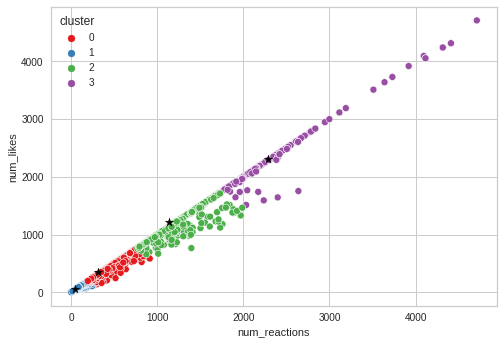

In [ ]:
sns.scatterplot('num_reactions', 'num_likes', data = X, hue = live['cluster'], palette= 'Set1', legend = 'full')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = '*', s = 80, c = 'Black')

## DBScan

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 2.5, min_samples = 6).fit(X)


In [ ]:
db.labels_

array([-1,  0, -1, ...,  0, 12,  0])

In [ ]:
set(db.labels_)

### DBScan Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


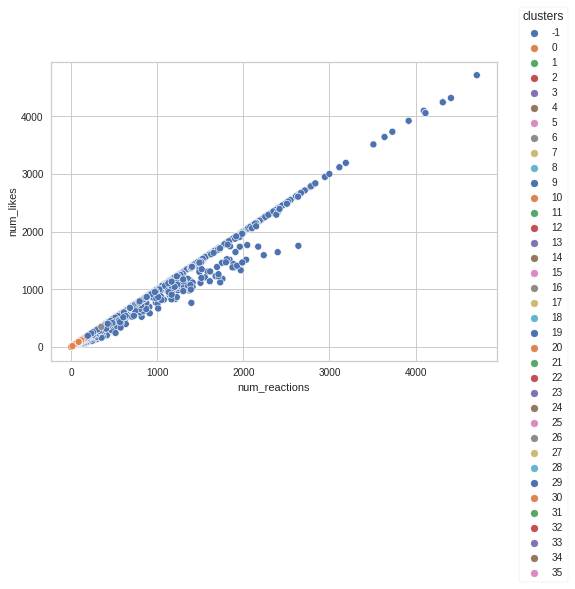

In [ ]:
p = sns.scatterplot('num_reactions','num_likes', data = X, hue = db.labels_, legend = 'full', palette = 'deep')
sns.move_legend(p, 'upper right', bbox_to_anchor = (1.17, 1.2), title = 'clusters')